In [1]:
import os
from collections import Counter
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from glob import glob

import datetime



In [21]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy, Precision, Recall

In [3]:
#Printing all file names under the input directory
for dirname, _, filenames in os.walk('./Training'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Training\Apple Braeburn\0_100.jpg
./Training\Apple Braeburn\100_100.jpg
./Training\Apple Braeburn\101_100.jpg
./Training\Apple Braeburn\102_100.jpg
./Training\Apple Braeburn\103_100.jpg
./Training\Apple Braeburn\104_100.jpg
./Training\Apple Braeburn\105_100.jpg
./Training\Apple Braeburn\106_100.jpg
./Training\Apple Braeburn\107_100.jpg
./Training\Apple Braeburn\108_100.jpg
./Training\Apple Braeburn\109_100.jpg
./Training\Apple Braeburn\10_100.jpg
./Training\Apple Braeburn\110_100.jpg
./Training\Apple Braeburn\111_100.jpg
./Training\Apple Braeburn\112_100.jpg
./Training\Apple Braeburn\113_100.jpg
./Training\Apple Braeburn\114_100.jpg
./Training\Apple Braeburn\115_100.jpg
./Training\Apple Braeburn\116_100.jpg
./Training\Apple Braeburn\117_100.jpg
./Training\Apple Braeburn\118_100.jpg
./Training\Apple Braeburn\119_100.jpg
./Training\Apple Braeburn\11_100.jpg
./Training\Apple Braeburn\120_100.jpg
./Training\Apple Braeburn\121_100.jpg
./Training\Apple Braeburn\122_100.jpg
./Training\Apple

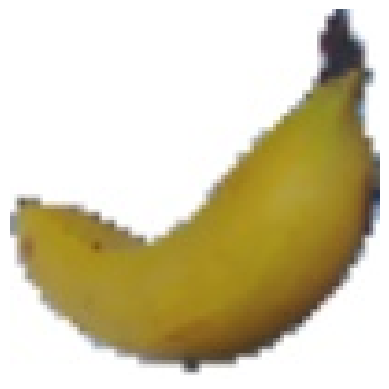

(100, 100, 3)


In [4]:
#Setting Training & Test dir paths
import PIL
train_path = 'Training'
test_path = 'Test'
#Displaying the image
image_1= load_img(train_path + "/Banana/0_100.jpg", target_size=(100,100))
plt.imshow(image_1)
plt.axis("off")
plt.show()
#Printing the shape of the image array 
x = img_to_array(image_1)
print(x.shape)

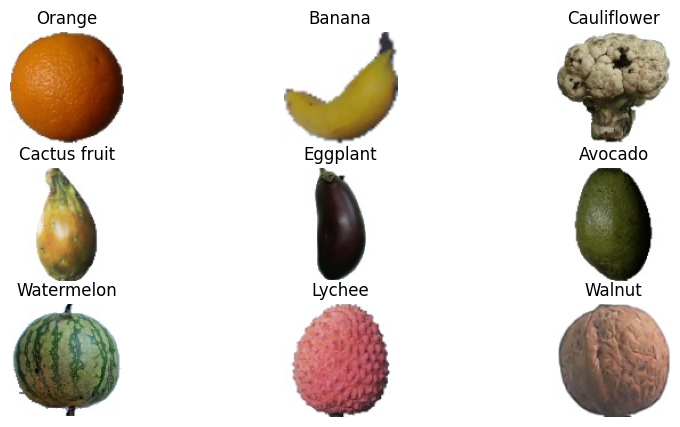

In [5]:
#Visualizing more Images
images = ['Orange', 'Banana', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Watermelon','Lychee', 'Walnut']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path +"/" + images[i] +"/0_100.jpg", target_size=(100,100)))

In [6]:
#Finding number of classes
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

131


In [7]:
#Creating the model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))

model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))

model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))

model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))

model.add(Dropout(0.5))
model.add(Dense(number_of_class)) 
model.add(Activation("softmax"))


In [8]:
from tensorflow.keras.callbacks import TensorBoard
file_name = 'my_saved_model'

In [9]:
tensorBoard = TensorBoard(log_dir= "logs\\{}".format(file_name))

In [29]:
#Compiling the model
model.compile(loss = "categorical_crossentropy",
optimizer = Adam(learning_rate=0.001),
metrics = ["accuracy"])


In [24]:
#Getting model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [25]:
#Specifing epochs & batch size
epochs = 100
batch_size = 64

In [26]:
#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [27]:
#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [30]:
#Fitting the model
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size,
callbacks=[tensorBoard])

C:\Users\Osama.kamal\AppData\Local\Temp\ipykernel_13536\3672310532.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/100
25/25 [==============================] - 14s 511ms/step - loss: 4.8168 - accuracy: 0.0194 - val_loss: 4.5416 - val_accuracy: 0.0495
Epoch 2/100
25/25 [==============================] - 11s 440ms/step - loss: 4.2265 - accuracy: 0.0681 - val_loss: 3.5170 - val_accuracy: 0.1966
Epoch 3/100
25/25 [==============================] - 11s 436ms/step - loss: 3.5083 - accuracy: 0.1244 - val_loss: 2.8941 - val_accuracy: 0.2799
Epoch 4/100
25/25 [==============================] - 12s 448ms/step - loss: 2.8535 - accuracy: 0.2488 - val_loss: 2.4206 - val_accuracy: 0.3255
Epoch 5/100
25/25 [==============================] - 11s 443ms/step - loss: 2.3945 - accuracy: 0.3344 - val_loss: 1.7950 - val_accuracy: 0.5104
Epoch 6/100
25/25 [==============================] - 11s 433ms/step - loss: 2.0183 - accuracy: 0.4056 - val_loss: 1.4914 - val_accuracy: 0.6042
Epoch 7/100
25/25 [==============================] - 11s 435ms/step - loss: 1.7473 - accuracy: 0.4787 - val_loss: 1.1901 - val_accuracy:

In [31]:
# save the trained model
model.save('my_model')

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


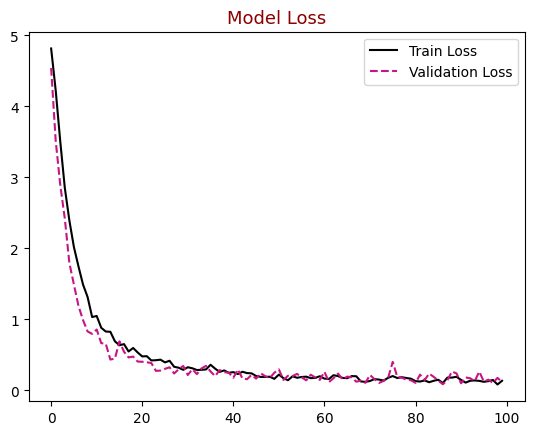

In [32]:
#Plotting train & validation loss
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

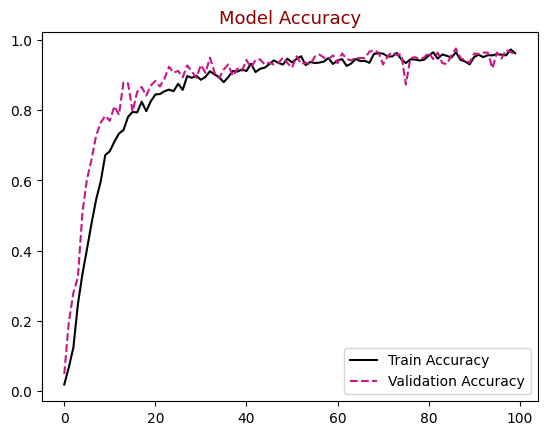

In [33]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

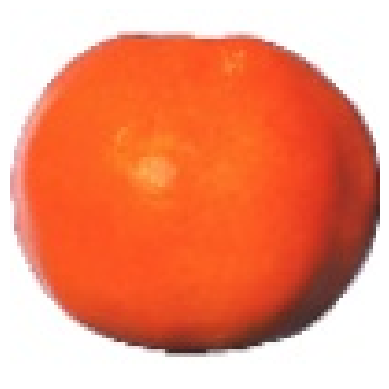

(100, 100, 3)


In [34]:
#Setting Training & Test dir paths
import PIL
train_path = 'Training'
test_path = 'Test'
#Displaying the image
image_5= load_img(test_path + "/Clementine/77_100.jpg", target_size=(100,100))
plt.imshow(image_5)
plt.axis("off")
plt.show()
#Printing the shape of the image array 
x = img_to_array(image_5)
print(x.shape)

In [35]:
#Loading the image 
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image


In [36]:
predict_image = load(test_path + "/Apricot/77_100.jpg")

In [37]:
#Predicting the class
prediction = (np.argmax(model.predict(predict_image), axis=-1))
print(prediction)

1/1 [==============================] - 0s 114ms/step
[13]


In [38]:
unknown_img1 = load("apple1.jpeg")

In [45]:
from PIL import Image

# Load the image
img_test_pred = Image.open("banana1.jpeg")

# Resize the image to match the input shape of your model
img_test_pred = img_test_pred.resize((100, 100))

# Convert the image to a numpy array
img_array = np.array(img_test_pred)

# Reshape the array to match the expected input shape of your model
img_array = img_array.reshape(1, 100, 100, 3)

In [42]:
#Printing class dictionary
print(test_generator.class_indices)

{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Grapefrui

In [46]:
#Predicting the class
prediction = (np.argmax(model.predict(img_array), axis=-1))
print(prediction)

1/1 [==============================] - 0s 27ms/step
[17]


In [ ]:
# load your test images and their ground truth labels
x_test = [...] # a numpy array of test images
y_test = [...] # a numpy array of test labels